# Descripcion

CustomerID
ID único asignado al cliente

Género
Género del cliente

Edad
Edad del cliente

Ingresos Anuales (k$)
Ingresos anuales del cliente

Puntuación de Gasto (1-100)
Puntuación asignada por el centro comercial basada en el comportamiento y la naturaleza de gasto del cliente

<a id='Reading_data'></a>
## 2. Reading data <a href='#Top' style="text-decoration: none;">^</a><br>

In this section, raw data will be read, overviewed and checked if any cleaning is required.

In [1]:
!pip install ydata_profiling

In [2]:
import seaborn as sns
import ydata_profiling
%matplotlib inline

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

print("pandas version: {}".format(pd.__version__))
print("numpy version: {}".format(np.__version__))
print("seaborn version: {}".format(sns.__version__))

pandas version: 2.0.3
numpy version: 1.25.2
seaborn version: 0.12.2


In [4]:
URL = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTT5rj9JPc_e8Or6B7208ccrpQ-MWYXYULtTwX10UW1ZmMQ-uaYfe6ak7nWjLABeWNFI9Ocelz1svSi/pub?output=csv'

In [5]:
mall_data = pd.read_csv(URL)

print('There are {} rows and {} columns in our dataset.'.format(mall_data.shape[0],mall_data.shape[1]))

There are 200 rows and 5 columns in our dataset.


In [6]:
mall_data.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
96,97,Female,47,60,47
154,155,Female,47,78,16
37,38,Female,30,34,73
114,115,Female,18,65,48
146,147,Male,48,77,36


In [7]:
mall_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Hay 5 columnas:
* `Customer ID` - numérico - número único de cliente - entero
* Género" - categórico - binario (hombre/mujer)
* Edad - numérico - entero
* Ingresos anuales (k$) - numérico - entero
* Puntuación de gasto (1-100)` - numérico - entero

Hay una columna binaria categórica: ```género``. Puede verse tentado a codificarla de una sola vez para la agrupación. Es:
* técnicamente posible
* teóricamente no prohibido
* prácticamente no recomendable



In [8]:
mall_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
mall_data.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
len(mall_data['Spending Score (1-100)'].unique())

84

No faltan datos. Esto simplifica el análisis, pero es un escenario muy improbable en la vida real donde los analistas dedican una cantidad significativa de tiempo a limpiar sus datos antes de realizar el análisis central.

<a id='Distributions'></a>
### 3.1 Distributions <a href='#Top' style="text-decoration: none;">^</a><br>

En este capítulo se investigarán en detalle las distribuciones de las variables numéricas. Los datos se estratificarán por sexo, la única variable categórica.

<ipython-input-11-90e711b08c1a>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(males_age, bins=age_bins, kde=False, color='#0066ff', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
<ipython-input-11-90e711b08c1a>:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(females_age, bins=age_bins, 

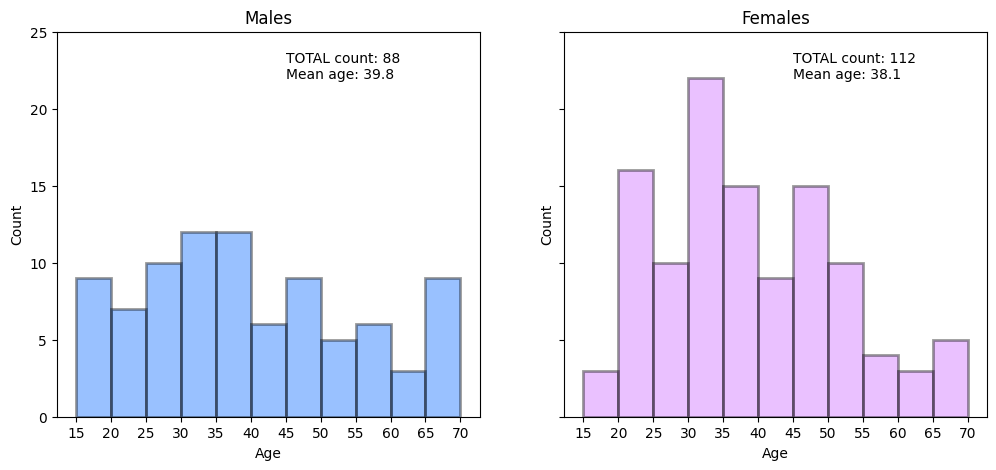

In [11]:
males_age = mall_data[mall_data['Gender']=='Male']['Age'] # subset with males age
females_age = mall_data[mall_data['Gender']=='Female']['Age'] # subset with females age

age_bins = range(15,75,5)

# males histogram
fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5), sharey=True)
sns.distplot(males_age, bins=age_bins, kde=False, color='#0066ff', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
ax1.set_xticks(age_bins)
ax1.set_ylim(top=25)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(45,23, "TOTAL count: {}".format(males_age.count()))
ax1.text(45,22, "Mean age: {:.1f}".format(males_age.mean()))

# females histogram
sns.distplot(females_age, bins=age_bins, kde=False, color='#cc66ff', ax=ax2, hist_kws=dict(edgecolor="k", linewidth=2))
ax2.set_xticks(age_bins)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(45,23, "TOTAL count: {}".format(females_age.count()))
ax2.text(45,22, "Mean age: {:.1f}".format(females_age.mean()))

plt.show()

In [12]:
print('Kolgomorov-Smirnov test p-value: {:.2f}'.format(stats.ks_2samp(males_age, females_age)[1]))

Kolgomorov-Smirnov test p-value: 0.49


La edad media de los clientes varones es ligeramente superior a la de las mujeres (39,8 frente a 38,1). La distribución de la edad de los hombres es más uniforme que la de las mujeres, donde se observa que el grupo de edad más numeroso es el de 30-35 años. La prueba de Kolgomorov-Smirnov muestra que las diferencias entre estos dos grupos son estadísticamente insignificantes.

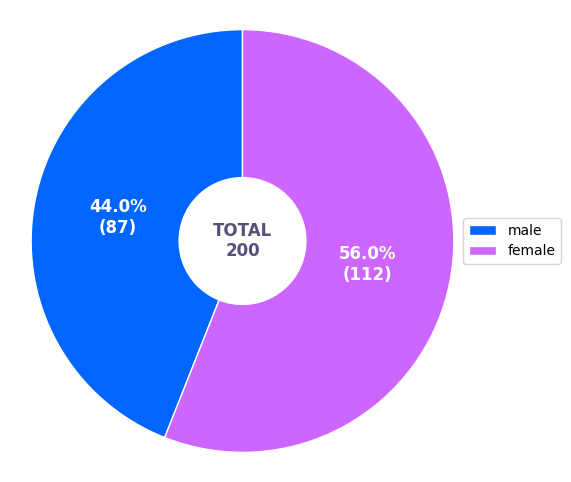

In [13]:
def labeler(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

sizes = [males_age.count(),females_age.count()] # wedge sizes

fig0, ax1 = plt.subplots(figsize=(6,6))
wedges, texts, autotexts = ax1.pie(sizes,
                                   autopct=lambda pct: labeler(pct, sizes),
                                   radius=1,
                                   colors=['#0066ff','#cc66ff'],
                                   startangle=90,
                                   textprops=dict(color="w"),
                                   wedgeprops=dict(width=0.7, edgecolor='w'))

ax1.legend(wedges, ['male','female'],
           loc='center right',
           bbox_to_anchor=(0.7, 0, 0.5, 1))

plt.text(0,0, 'TOTAL\n{}'.format(mall_data['Age'].count()),
         weight='bold', size=12, color='#52527a',
         ha='center', va='center')

plt.setp(autotexts, size=12, weight='bold')
ax1.axis('equal')  # Equal aspect ratio
plt.show()

El número de mujeres es ligeramente superior al de hombres (112 frente a 87). Las mujeres representan el 56% del total de clientes.

<ipython-input-14-0d86fc4a2b23>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(males_income, bins=my_bins, kde=False, color='#0066ff', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
<ipython-input-14-0d86fc4a2b23>:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(females_income, bins=my_bi

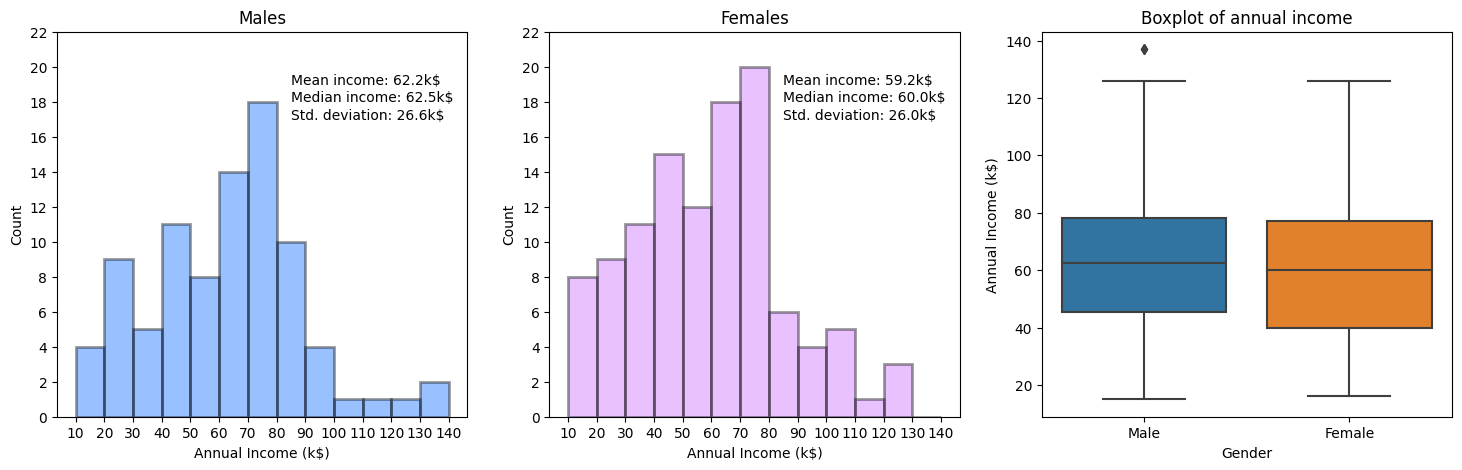

In [14]:
males_income = mall_data[mall_data['Gender']=='Male']['Annual Income (k$)'] # subset with males income
females_income = mall_data[mall_data['Gender']=='Female']['Annual Income (k$)'] # subset with females income

my_bins = range(10,150,10)

# males histogram
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,5))
sns.distplot(males_income, bins=my_bins, kde=False, color='#0066ff', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
ax1.set_xticks(my_bins)
ax1.set_yticks(range(0,24,2))
ax1.set_ylim(0,22)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(85,19, "Mean income: {:.1f}k$".format(males_income.mean()))
ax1.text(85,18, "Median income: {:.1f}k$".format(males_income.median()))
ax1.text(85,17, "Std. deviation: {:.1f}k$".format(males_income.std()))

# females histogram
sns.distplot(females_income, bins=my_bins, kde=False, color='#cc66ff', ax=ax2, hist_kws=dict(edgecolor="k", linewidth=2))
ax2.set_xticks(my_bins)
ax2.set_yticks(range(0,24,2))
ax2.set_ylim(0,22)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(85,19, "Mean income: {:.1f}k$".format(females_income.mean()))
ax2.text(85,18, "Median income: {:.1f}k$".format(females_income.median()))
ax2.text(85,17, "Std. deviation: {:.1f}k$".format(females_income.std()))

# boxplot
sns.boxplot(x='Gender', y='Annual Income (k$)', data=mall_data, ax=ax3)
ax3.set_title('Boxplot of annual income')
plt.show()

In [15]:
print('Kolgomorov-Smirnov test p-value: {:.2f}'.format(stats.ks_2samp(males_income, females_income)[1]))

Kolgomorov-Smirnov test p-value: 0.78


Los ingresos medios de los hombres son superiores a los de las mujeres (62,2 k\\$ frente a 59,2k\\$). También la mediana de ingresos de los clientes masculinos (62,5k\\$) es superior a la de los femeninos (60k\$). La desviación típica es similar en ambos grupos. Hay un valor atípico en el grupo masculino, con unos ingresos anuales de 140.000 $. La prueba K-S muestra que estos dos grupos no son estadísticamente diferentes.

<ipython-input-16-95f80557e0ae>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(males_spending, bins=spending_bins, kde=False, color='#0066ff', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
<ipython-input-16-95f80557e0ae>:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(females_spending, 

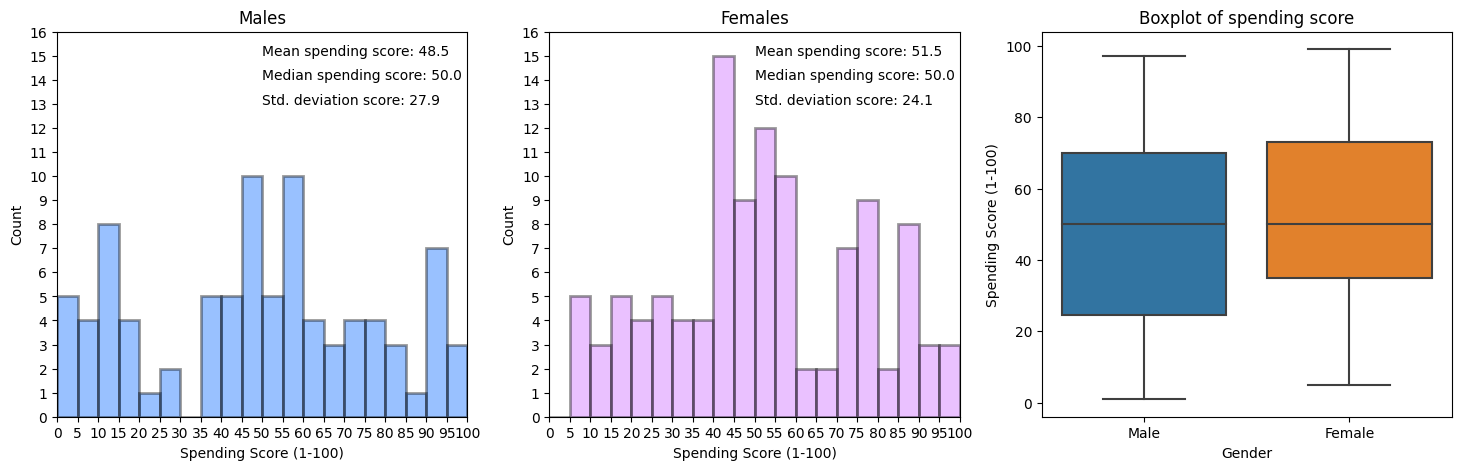

In [16]:
males_spending = mall_data[mall_data['Gender']=='Male']['Spending Score (1-100)'] # subset with males age
females_spending = mall_data[mall_data['Gender']=='Female']['Spending Score (1-100)'] # subset with females age

spending_bins = range(0,105,5)

# males histogram
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,5))
sns.distplot(males_spending, bins=spending_bins, kde=False, color='#0066ff', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
ax1.set_xticks(spending_bins)
ax1.set_xlim(0,100)
ax1.set_yticks(range(0,17,1))
ax1.set_ylim(0,16)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(50,15, "Mean spending score: {:.1f}".format(males_spending.mean()))
ax1.text(50,14, "Median spending score: {:.1f}".format(males_spending.median()))
ax1.text(50,13, "Std. deviation score: {:.1f}".format(males_spending.std()))

# females histogram
sns.distplot(females_spending, bins=spending_bins, kde=False, color='#cc66ff', ax=ax2, hist_kws=dict(edgecolor="k", linewidth=2))
ax2.set_xticks(spending_bins)
ax2.set_xlim(0,100)
ax2.set_yticks(range(0,17,1))
ax2.set_ylim(0,16)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(50,15, "Mean spending score: {:.1f}".format(females_spending.mean()))
ax2.text(50,14, "Median spending score: {:.1f}".format(females_spending.median()))
ax2.text(50,13, "Std. deviation score: {:.1f}".format(females_spending.std()))

# boxplot
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=mall_data, ax=ax3)
ax3.set_title('Boxplot of spending score')
plt.show()

plt.show()

In [17]:
print('Kolgomorov-Smirnov test p-value: {:.2f}'.format(stats.ks_2samp(males_spending, females_spending)[1]))

Kolgomorov-Smirnov test p-value: 0.29


La puntuación media de gasto de las mujeres (51,5) es superior a la de los hombres (48,5). El valor p de la prueba K-S indica que no hay pruebas para rechazar la hipótesis nula, aunque las pruebas no son tan sólidas como en las comparaciones anteriores.
A continuación calcularé los ingresos medios de todos los grupos de edad.

In [18]:
medians_by_age_group = mall_data.groupby(["Gender",pd.cut(mall_data['Age'], age_bins)]).median()
medians_by_age_group.index = medians_by_age_group.index.set_names(['Gender', 'Age_group'])
medians_by_age_group.reset_index(inplace=True)

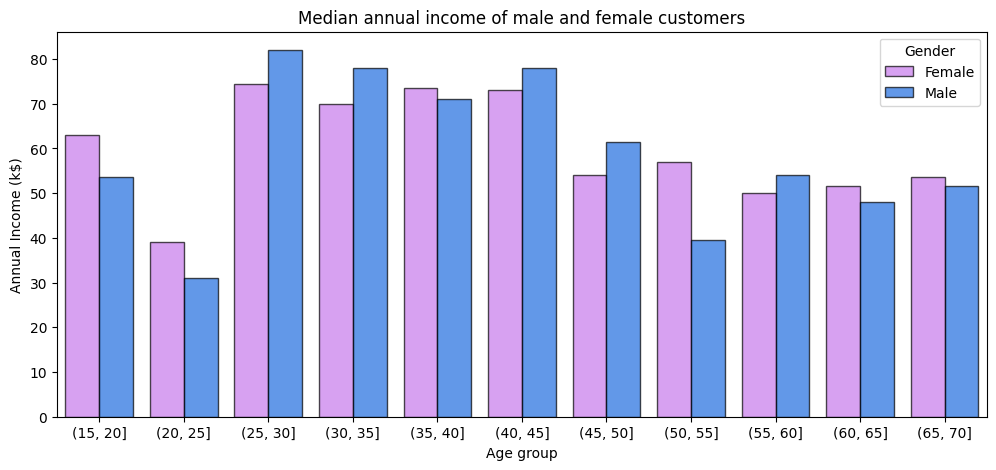

In [19]:
fig, ax = plt.subplots(figsize=(12,5))
sns.barplot(x='Age_group', y='Annual Income (k$)', hue='Gender', data=medians_by_age_group,
            palette=['#cc66ff','#0066ff'],
            alpha=0.7,edgecolor='k',
            ax=ax)
ax.set_title('Median annual income of male and female customers')
ax.set_xlabel('Age group')
plt.show()

El gráfico de barras anterior muestra que los clientes más ricos tienen entre 25 y 45 años. La mayor diferencia entre mujeres y hombres se aprecia en los grupos de edad de 25-30 años (los hombres son más ricos) y 50-55 años (las mujeres son más ricas).

<a id='Correlations'></a>
### 3.2 Correlations<a href='#Top' style="text-decoration: none;">^</a><br>
Este capítulo investiga las correlaciones entre variables numéricas.

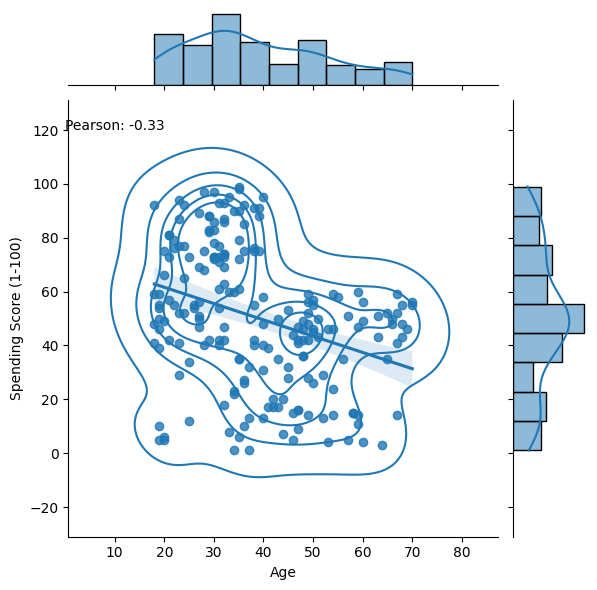

In [20]:
from scipy.stats import pearsonr

corr, _ = pearsonr(mall_data['Age'], mall_data['Spending Score (1-100)'])

# Crear el jointplot
jp = sns.jointplot(x='Age', y='Spending Score (1-100)', data=mall_data, kind='reg')

# También puedes pasar el DataFrame al kdeplot usando la API de axes-level,
# de esta manera no estarás pasando 'data' dos veces.
jp.ax_joint = sns.kdeplot(x=mall_data['Age'], y=mall_data['Spending Score (1-100)'],
                          ax=jp.ax_joint, zorder=0, n_levels=6)

# Agregar texto con el valor de la correlación de Pearson
plt.text(0, 120, 'Pearson: {:.2f}'.format(corr))

# Mostrar el gráfico final
plt.show()

Existe una correlación insignificante entre los ingresos anuales y la puntuación de gasto de los clientes de ambos sexos.

<a id='Clustering'></a>
## 4. Clustering<a href='#Top' style="text-decoration: none;">^</a><br>  

Esta sección del cuaderno describe y demuestra cómo utilizar tres algoritmos de clustering:  
* K-Means
* Agrupación espacial basada en la densidad de aplicaciones con ruido (DBSCAN)
* Propagación de afinidad.



<a id='K-Means'></a>
### 4.1 K-Means<a href='#Top' style="text-decoration: none;">^</a><br>  






En general, un usuario del algoritmo K-Means debe definir tres parámetros principales:<br>  

1. **Criterios de inicialización**  
    En scikit-learn, se implementa un esquema de inicialización inteligente: "k-means++" propuesto por Arthur y Vassilvitskii. Crea centroides iniciales generalmente distantes entre sí aumentando la probabilidad de obtener mejores resultados. También existe la posibilidad de utilizar un generador de puntos aleatorios. Hay esfuerzos en curso para crear el método de siembra más eficiente para el algoritmo K-Means, uno de ellos se basa en el Análisis de Componentes Independientes y se puede leer más sobre él [aquí](http://www.ymd.nii.ac.jp/lab/publication/conference/2010/IWI-Onoda-2010.pdf).

2. **Número de clusters**  
    La selección del número de clusters es la parte más complicada de la configuración de este algoritmo. No existen criterios matemáticos sólidos para ello y se han desarrollado muchos enfoques heurísticos/simplificados. Uno de los más sencillos y populares es el método del codo que se muestra en este análisis. También se utilizará una puntuación de silueta.
    También hay otras opciones, a menudo avanzadas, para elegir el número óptimo de clusters (sin embargo, no se utilizan en este cuaderno y no se implementan en sklearn), por ejemplo:
  

3. **Una métrica de distancia (no requerida en la implementación de scikit learn)**.  
    Existen varias opciones para calcular la distancia entre puntos. La más popular es simplemente la métrica euclidiana y es la implementada en scikit-learn. A menudo se denomina modelo k-means esférico. Tiene el inconveniente de que sólo encuentra grupos de tipo esférico y tiende a inflarse en análisis muy multidimensionales ("maldición de la dimensionalidad"). Existen otras opciones pero no están implementadas en scikit-learn, por ejemplo
    
    
* Distancia Mahalonobis (alto coste computacional)
* Distancia Itakura-Saito
* Distancia L1
* Distancia coseno
* Distancia Bregman


Existen numerosas investigaciones en curso y variaciones propuestas para K-Means, por ejemplo  
* K-Medoid, en el que el centroide se define como el objeto situado más al centro.)
* K-Median: el centroide se calcula utilizando la mediana en lugar de la media,
* Modelo C-means difuso

Algunas conclusiones sobre K-Means:

1. 1. Se utilizan distancias euclidianas
2. Hay que definir el número de conglomerados para el algoritmo
3. El centroide se calcula utilizando la distancia media a los miembros del cluster
4. Los conglomerados se suponen isótropos y convexos
5. Algoritmo estocástico: los resultados dependen de los criterios de inicialización
6. Crea grupos de igual varianza (minimiza la inercia)
7. Propenso a la "maldición de la dimensionalidad"
8. Puede ejecutarse en paralelo, por lo que se adapta bien a la escala.

<a id='K-Means_use_case'></a>
### 4.1.2 Use case - customers segmentation<a href='#Top' style="text-decoration: none;">^</a><br>  

El primer paso en un análisis de clustering es importar K-Means desde la librería sklearn.

In [21]:
from sklearn.cluster import KMeans

Para la agrupación sólo se utilizan columnas numéricas. Como se mencionó al principio, la variable binaria "género" no se utilizará aquí.


In [22]:
X_numerics = mall_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] # subset with numeric variables only

Para encontrar un número adecuado de conglomerados, se utilizará el método del codo. En este método para este caso, se calculará la inercia para un número de conglomerados entre 2 y 10. La regla consiste en elegir el número de conglomerados en el que se observa un pliegue o "codo" en el gráfico.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

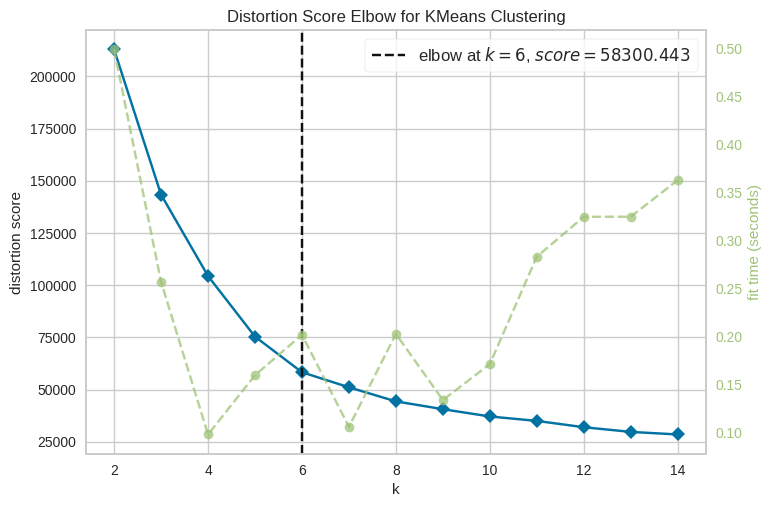

In [23]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,15))

visualizer.fit(X_numerics)
visualizer.show()
plt.show()

El gráfico anterior muestra la reducción de una puntuación de distorsión a medida que aumenta el número de agrupaciones. Sin embargo, no se aprecia ningún "codo" claro. El algoritmo subyacente sugiere 5 clusters. Una elección de 5 o 6 clusters parece justa.

Otra forma de elegir el mejor número de conglomerados es trazar la puntuación de silueta en función del número de conglomerados. Veamos los resultados.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

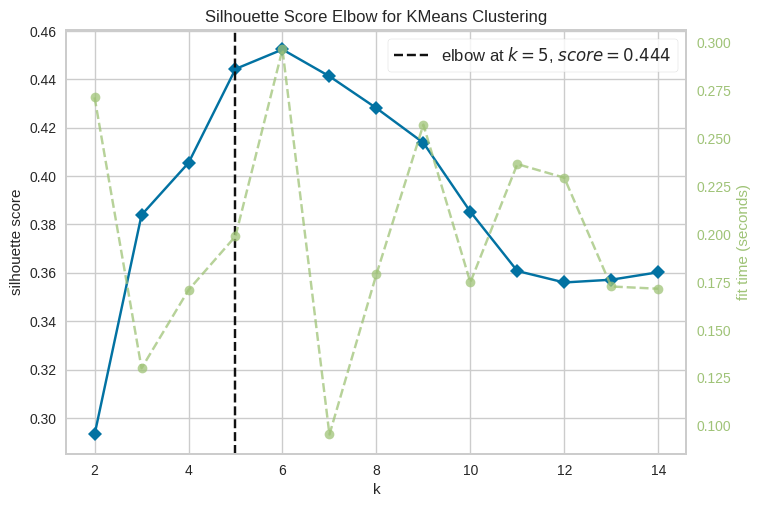

In [24]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,15), metric='silhouette')

visualizer.fit(X_numerics)
visualizer.show()
plt.show()

El método de puntuación de la silueta indica que las mejores opciones serían 5 o 6 agrupaciones. Comparemos ambos.

<u>**5 CLUSTERS**</u>

In [25]:
KM_5_clusters = KMeans(n_clusters=5, init='k-means++').fit(X_numerics) # initialise and fit K-Means model

KM5_clustered = X_numerics.copy()
KM5_clustered.loc[:,'Cluster'] = KM_5_clusters.labels_ # append labels to points

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


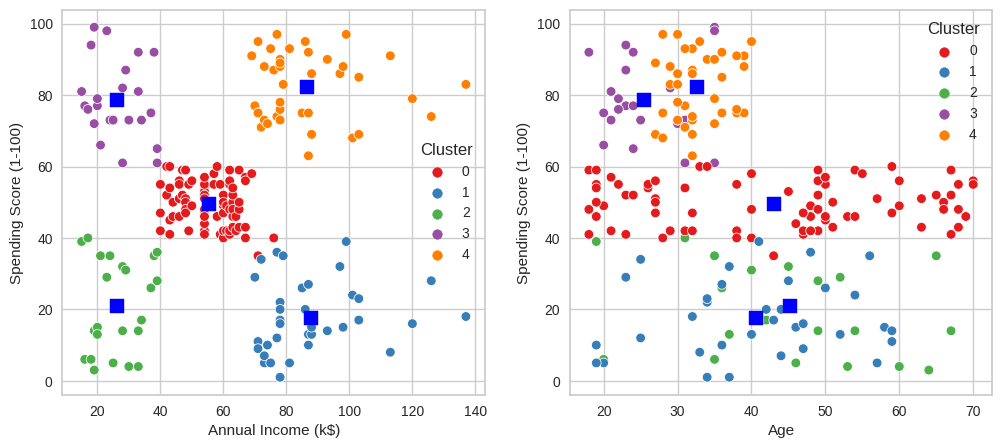

In [26]:
fig1, axes = plt.subplots(1,2, figsize=(12,5))

# Ensure your column names are correct and the data is loaded into the KM5_clustered dataframe.
# Also ensure the cluster centers are correctly loaded into KM_5_clusters.cluster_centers_.
scat_1 = sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=KM5_clustered,
                         hue='Cluster', ax=axes[0], palette='Set1', legend='full')

sns.scatterplot(x='Age', y='Spending Score (1-100)', data=KM5_clustered,
                hue='Cluster', ax=axes[1], palette='Set1', legend='full')

# Assuming KM_5_clusters.cluster_centers_ is a NumPy array with columns in the correct order.
axes[0].scatter(KM_5_clusters.cluster_centers_[:, 1], KM_5_clusters.cluster_centers_[:, 2],
                marker='s', s=100, c="blue")

axes[1].scatter(KM_5_clusters.cluster_centers_[:, 0], KM_5_clusters.cluster_centers_[:, 2],
                marker='s', s=100, c="blue")

plt.show()

El algoritmo K-Means generó los 5 clusters siguientes:

* clientes con ingresos anuales bajos y puntuación de gasto alta
* clientes con ingresos anuales medios y puntuación de gasto media
* clientes con ingresos anuales altos y puntuación de gasto baja
* clientes con ingresos anuales altos y puntuación de gasto alta
* clientes con ingresos anuales bajos y puntuación de gasto baja

No existen grupos diferenciados en función de la edad de los clientes.

Sizes of the clusters:

In [27]:
KM_clust_sizes = KM5_clustered.groupby('Cluster').size().to_frame()
KM_clust_sizes.columns = ["KM_size"]
KM_clust_sizes

,KM_size
Cluster,
0,79
1,36
2,23
3,23
4,39


El cluster más grande es el número 1 con 79 observaciones (clientes "medio-medio"). Los más pequeños son dos, cada uno con 23 observaciones (cluster 3 clientes "alto-alto" y cluster 0 clientes "bajo-alto"). A continuación se muestra una proyección en 3D de los 5 clusters generados. No es muy útil en términos de visualización en modo estático, pero si ejecuta el código en un entorno interactivo (por ejemplo, Spyder) ¡podrá girarlo!

In [28]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7, 7))
ax = Axes3D(fig, rect=[0, 0, .99, 1], elev=20, azim=210)
ax.scatter(KM5_clustered['Age'],
           KM5_clustered['Annual Income (k$)'],
           KM5_clustered['Spending Score (1-100)'],
           c=KM5_clustered['Cluster'],
           s=35, edgecolor='k', cmap=plt.cm.Set1)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('3D view of K-Means 5 clusters')
ax.dist = 12

plt.show()

<ipython-input-28-2aceea3e6f93>:11: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.set_ticklabels([])
<ipython-input-28-2aceea3e6f93>:12: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.set_ticklabels([])
<ipython-input-28-2aceea3e6f93>:13: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax.w_zaxis.set_ticklabels([])
<ipython-input-28-2aceea3e6f93>:18: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 12


<Figure size 700x700 with 0 Axes>

Below a Plotly version:

In [29]:
import plotly as py
import plotly.graph_objs as go

def tracer(db, n, name):
    '''
    This function returns trace object for Plotly
    '''
    return go.Scatter3d(
        x = db[db['Cluster']==n]['Age'],
        y = db[db['Cluster']==n]['Spending Score (1-100)'],
        z = db[db['Cluster']==n]['Annual Income (k$)'],
        mode = 'markers',
        name = name,
        marker = dict(
            size = 5
        )
     )

trace0 = tracer(KM5_clustered, 0, 'Cluster 0')
trace1 = tracer(KM5_clustered, 1, 'Cluster 1')
trace2 = tracer(KM5_clustered, 2, 'Cluster 2')
trace3 = tracer(KM5_clustered, 3, 'Cluster 3')
trace4 = tracer(KM5_clustered, 4, 'Cluster 4')

data = [trace0, trace1, trace2, trace3, trace4]

layout = go.Layout(
    title = 'Clusters by K-Means',
    scene = dict(
            xaxis = dict(title = 'Age'),
            yaxis = dict(title = 'Spending Score'),
            zaxis = dict(title = 'Annual Income')
        )
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

To check the quality of each cluster we can examine the Silhuette plot.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



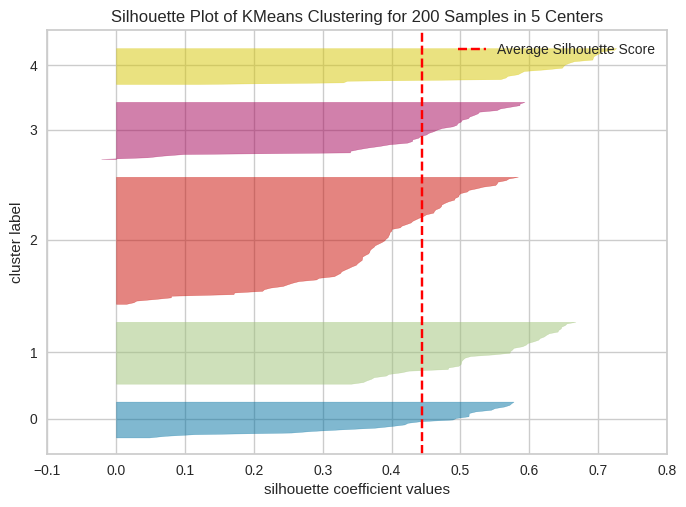

In [30]:
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(n_clusters=5, random_state=0)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X_numerics)
visualizer.show()
plt.show()

<u>**6 CLUSTERS**</u>

In [31]:
KM_6_clusters = KMeans(n_clusters=6, init='k-means++').fit(X_numerics) # initialise and fit K-Means model

KM6_clustered = X_numerics.copy()
KM6_clustered.loc[:,'Cluster'] = KM_6_clusters.labels_ # append labels to points

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



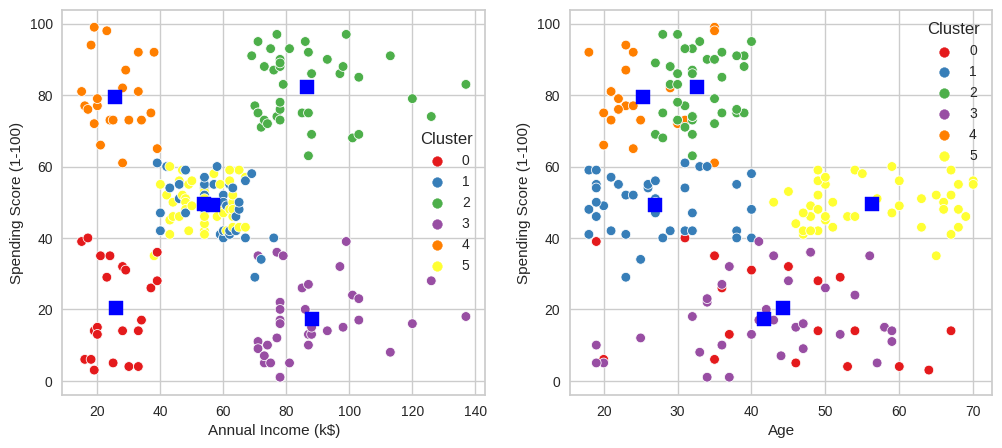

In [32]:
fig11, axes = plt.subplots(1, 2, figsize=(12, 5))

# Make sure to use x= and y= to explicitly specify the columns for the scatterplot
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=KM6_clustered,
                hue='Cluster', ax=axes[0], palette='Set1', legend='full')

sns.scatterplot(x='Age', y='Spending Score (1-100)', data=KM6_clustered,
                hue='Cluster', ax=axes[1], palette='Set1', legend='full')

# Plotting centroids
axes[0].scatter(KM_6_clusters.cluster_centers_[:, 1], KM_6_clusters.cluster_centers_[:, 2], marker='s', s=100, c="blue")
axes[1].scatter(KM_6_clusters.cluster_centers_[:, 0], KM_6_clusters.cluster_centers_[:, 2], marker='s', s=100, c="blue")

plt.show()

El algoritmo K-Means generó los 6 clusters siguientes:

* Clientes más jóvenes con puntaje de gasto anual **medio** y **medio**
* Clientes con ingresos anuales **altos** y puntaje de gastos **bajo**
* Clientes más jóvenes con puntaje de gasto anual **medio** y **medio**
* Clientes con ingresos anuales **altos** y puntaje de gastos **alto**
* Clientes con ingresos anuales **bajos** y puntaje de gastos **bajo**
* Clientes con ingresos anuales **bajos** y puntaje de gastos **alto**

No hay grupos distintos en función de la edad de los clientes.





In [33]:
KM6_clust_sizes = KM6_clustered.groupby('Cluster').size().to_frame()
KM6_clust_sizes.columns = ["KM_size"]
KM6_clust_sizes

,KM_size
Cluster,
0,22
1,38
2,39
3,35
4,22
5,44


In [34]:
# Plotly interactive 3D plot

trace0 = tracer(KM6_clustered, 0, 'Cluster 0')
trace1 = tracer(KM6_clustered, 1, 'Cluster 1')
trace2 = tracer(KM6_clustered, 2, 'Cluster 2')
trace3 = tracer(KM6_clustered, 3, 'Cluster 3')
trace4 = tracer(KM6_clustered, 4, 'Cluster 4')
trace5 = tracer(KM6_clustered, 5, 'Cluster 5')

data = [trace0, trace1, trace2, trace3, trace4, trace5]

layout = go.Layout(
    title = 'Clusters by K-Means',
    scene = dict(
            xaxis = dict(title = 'Age'),
            yaxis = dict(title = 'Spending Score'),
            zaxis = dict(title = 'Annual Income')
        )
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



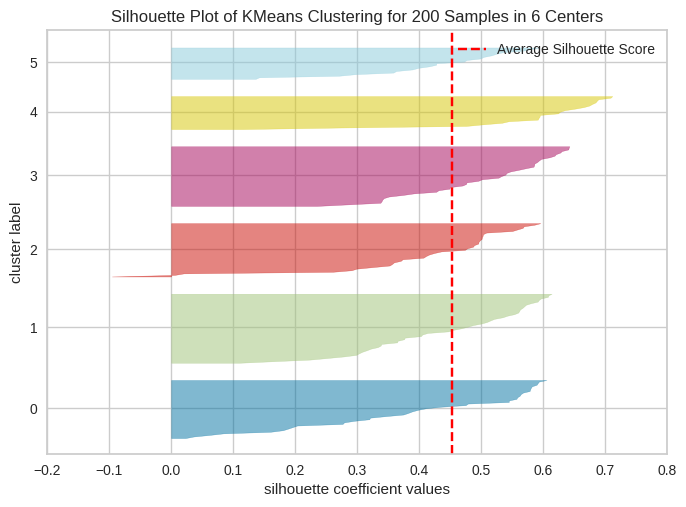

In [35]:
model = KMeans(n_clusters=6, random_state=0)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X_numerics)
visualizer.show()
plt.show()

<a id='DBSCAN'></a>
### 4.2 DBSCAN<a href='#Top' style="text-decoration: none;">^</a><br>  



<a id='DBSCAN description'></a>

Por tanto, se crea una "región densa" con un número mínimo de puntos dentro de la distancia entre todos ellos, Eps. Los puntos que están dentro de esta distancia pero no cerca de un número mínimo de otros puntos se tratan como "puntos fronterizos". Los restantes son ruido o valores atípicos. Esto se muestra en la siguiente imagen (para MinPts=3). Los puntos rojos (D) se encuentran en una "región densa": cada uno tiene un mínimo de 3 vecinos a una distancia Eps. Los puntos verdes (B) se encuentran en los bordes: tienen un vecino a una distancia Eps pero inferior a 3. El punto azul (O) es un valor atípico: no tiene vecinos a una distancia Eps.

Ventajas de este método:
* Encuentra el número de conglomerados por sí mismo, basándose en los parámetros eps y MinPts.
* Es capaz de diferenciar clusters alargados o clusters rodeados de otros clusters, al contrario que, por ejemplo, K-Means, donde los clusters son siempre convexos.
* También es capaz de encontrar puntos que no encajan en ningún cluster - detecta outliers.  

El mayor inconveniente de DBSCAN:
* Alto coste computacional de media O(n log(n)) debido a la necesidad de ejecutar una consulta de vecindad para cada punto.
* Identifica mal los conglomerados con varias densidades.


<a id='DBSCAN '></a>
### 4.2.2 customers segmentation<a href='#Top' style="text-decoration: none;">^</a><br>  

El primer paso - importar DBSCAN desde sklearn.

In [36]:
from sklearn.cluster import DBSCAN

En DBSCAN hay dos hiperparámetros principales:
* `eps
* `min_samples`

Es difícil decir arbitrariamente qué valores funcionarán mejor. Por lo tanto, primero crearé una matriz de combinaciones investigadas.

In [37]:
from itertools import product

eps_values = np.arange(8,12.75,0.25) # eps values to be investigated
min_samples = np.arange(3,10) # min_samples values to be investigated

DBSCAN_params = list(product(eps_values, min_samples))

Dado que DBSCAN crea clusters por sí mismo basándose en esos dos parámetros, comprobemos el número de clusters generados.

In [38]:
from sklearn.metrics import silhouette_score

no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(X_numerics)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(X_numerics, DBS_clustering.labels_))

In [39]:
from collections import Counter

conteo = Counter(no_of_clusters).most_common()

for i in conteo:
  print(f' * Clusters: {i[0]} \t Apariciones: {i[1]}')

 * Clusters: 5 	 Apariciones: 37
 * Clusters: 6 	 Apariciones: 31
 * Clusters: 7 	 Apariciones: 24
 * Clusters: 4 	 Apariciones: 14
 * Clusters: 8 	 Apariciones: 11
 * Clusters: 11 	 Apariciones: 6
 * Clusters: 10 	 Apariciones: 3
 * Clusters: 12 	 Apariciones: 3
 * Clusters: 13 	 Apariciones: 2
 * Clusters: 17 	 Apariciones: 1
 * Clusters: 14 	 Apariciones: 1


A continuación se muestra un gráfico de calor que muestra el número de clusters generados por el algoritmo DBSCAN para las respectivas combinaciones de parámetros.

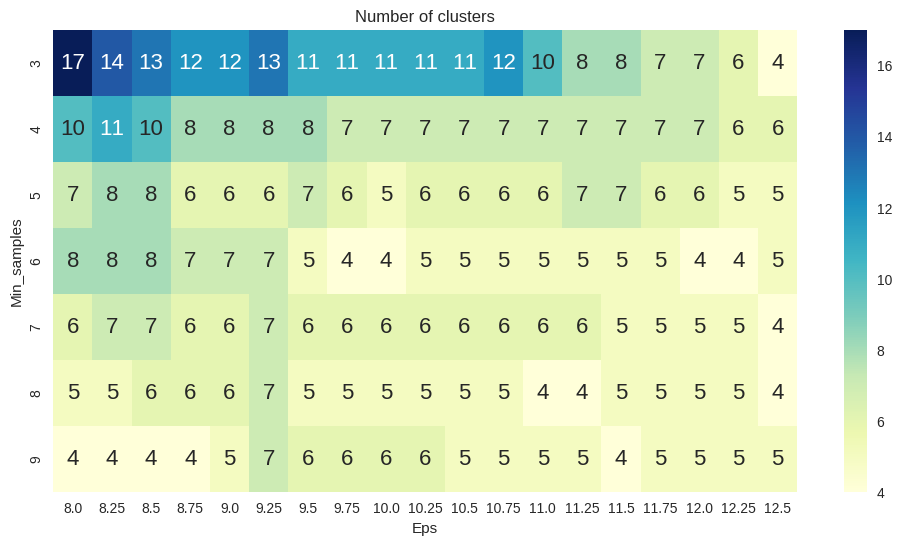

In [40]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()

El gráfico de calor anterior muestra que el número de conglomerados varía entre 17 y 4. Sin embargo, la mayoría de las combinaciones ofrecen entre 4 y 7 conglomerados.
Para decidir qué combinación elegir, utilizaré una métrica, la puntuación silhuette, y la representaré de nuevo como un gráfico de calor.

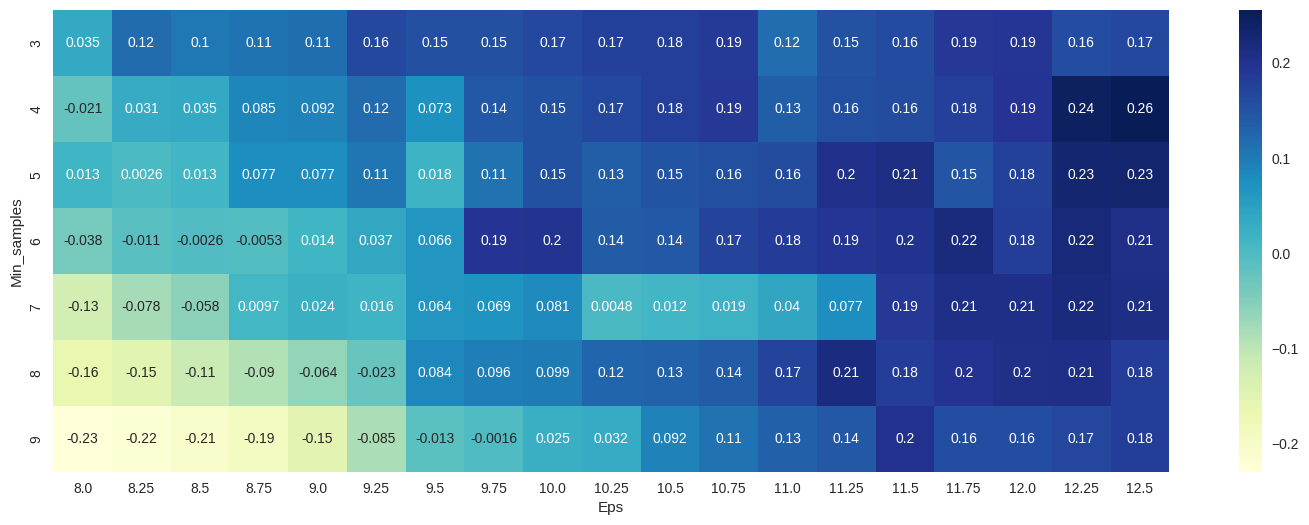

In [41]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

Global maximum is 0.26 for `eps`=12.5 and `min_samples`=4.

In [42]:
DBS_clustering = DBSCAN(eps=12.25, min_samples=5).fit(X_numerics)

DBSCAN_clustered = X_numerics.copy()
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_ # append labels to points

DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

,DBSCAN_size
Cluster,
-1,34
0,108
1,6
2,34
3,18


In [43]:
DBS_clustering = DBSCAN(eps=12.5, min_samples=4).fit(X_numerics)

DBSCAN_clustered = X_numerics.copy()
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_ # append labels to points

DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

,DBSCAN_size
Cluster,
-1,18
0,112
1,8
2,34
3,24
4,4


<a id='Comparación'></a>
## 5. Comparación  <a href='#Top' style="text-decoration: none;">^</a><br>



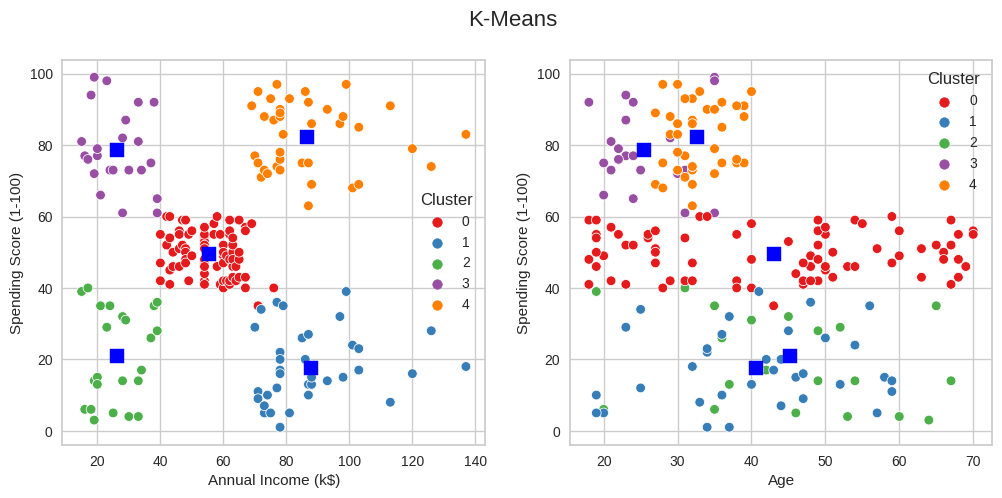

In [44]:
fig1.suptitle('K-Means', fontsize=16)
fig1

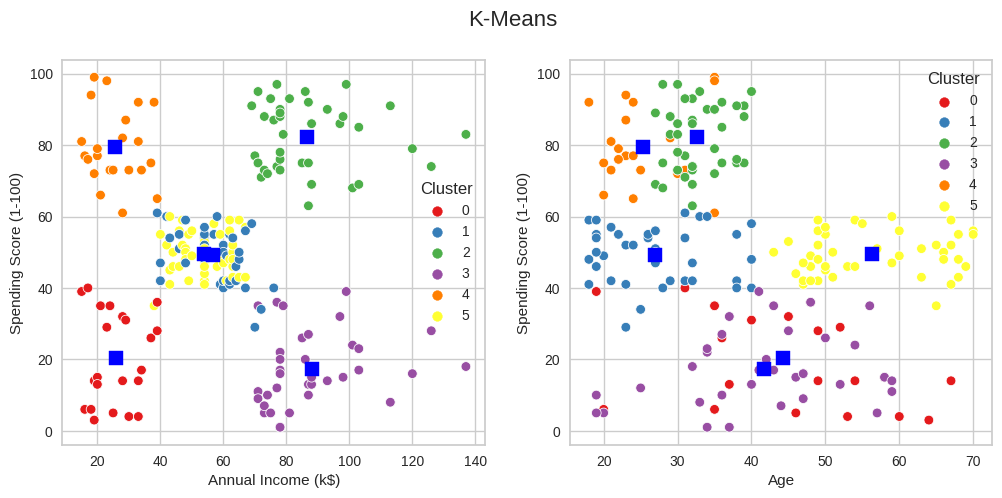

In [45]:
fig11.suptitle('K-Means', fontsize=16)
fig11

In [69]:
DBS_clustering = DBSCAN(eps=12.5, min_samples=4).fit_predict(X_numerics)

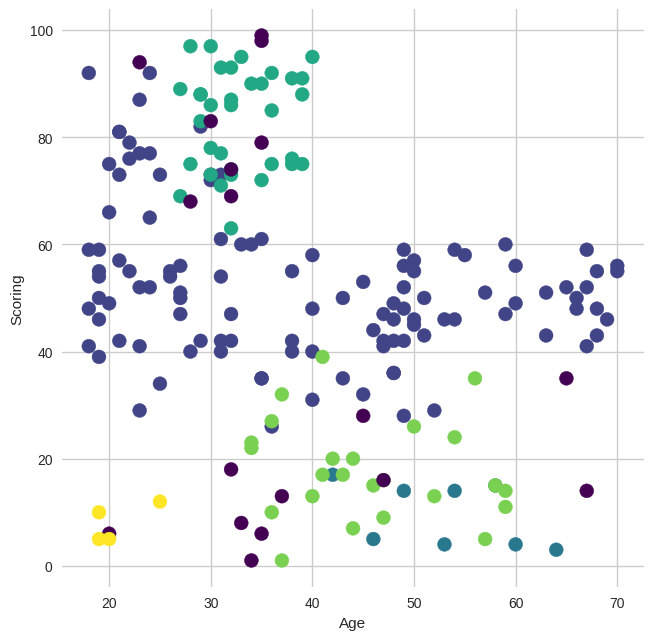

In [72]:
# Gráfica de matplotlib para mostrar los Clusters
plt.figure(figsize=(7.5, 7.5))
plt.scatter(X_numerics.values[:, 0], X_numerics.values[:, 2], c=DBS_clustering, s=100, cmap='viridis')
plt.xlabel("Age")
plt.ylabel("Scoring")
plt.box(False)
plt.show()

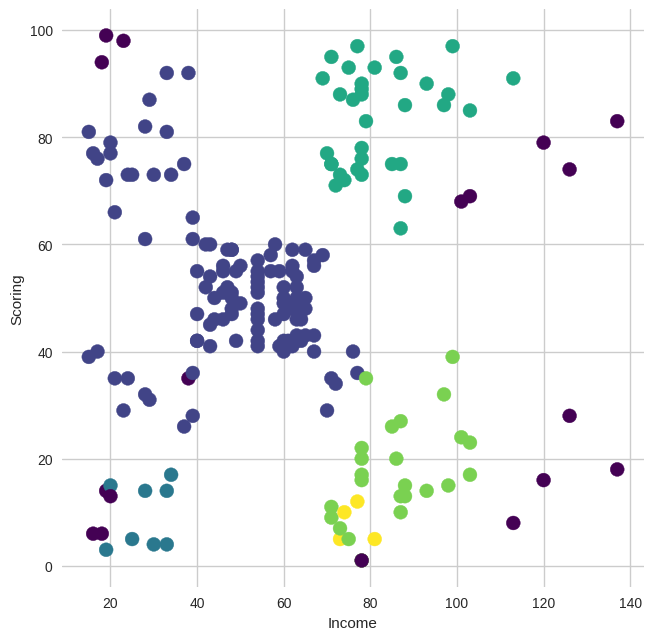

In [73]:
# Gráfica de matplotlib para mostrar los Clusters
plt.figure(figsize=(7.5, 7.5))
plt.scatter(X_numerics.values[:, 1], X_numerics.values[:, 2], c=DBS_clustering, s=100, cmap='viridis')
plt.xlabel("Income")
plt.ylabel("Scoring")
plt.box(False)
plt.show()

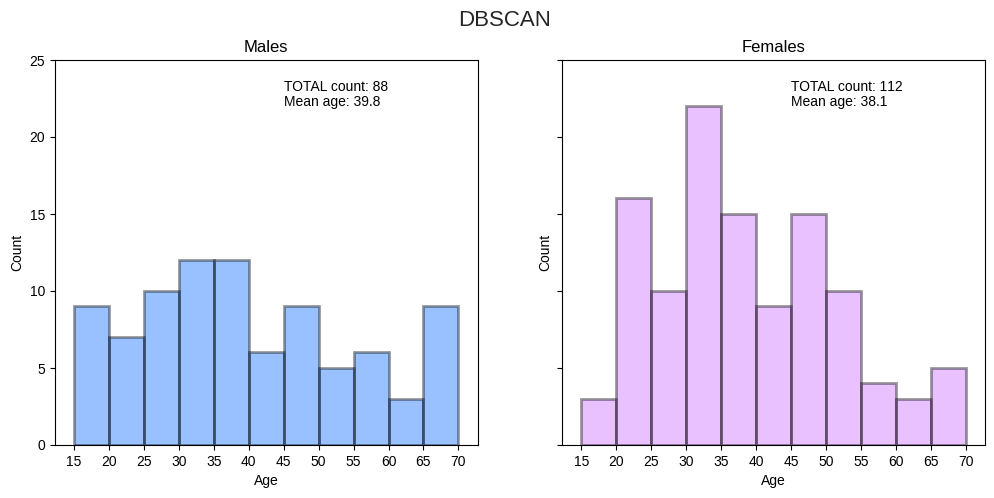

In [46]:
fig2.suptitle('DBSCAN', fontsize=16)
fig2

In [47]:
clusters = pd.concat([KM6_clust_sizes, DBSCAN_clust_sizes],axis=1, sort=False)
clusters

,KM_size,DBSCAN_size
Cluster,,
0,22.0,112.0
1,38.0,8.0
2,39.0,34.0
3,35.0,24.0
4,22.0,4.0
5,44.0,NaN
-1,NaN,18.0


# AgglomerativeClustering

In [86]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_numerics_scaled = scaler.fit_transform(X_numerics)

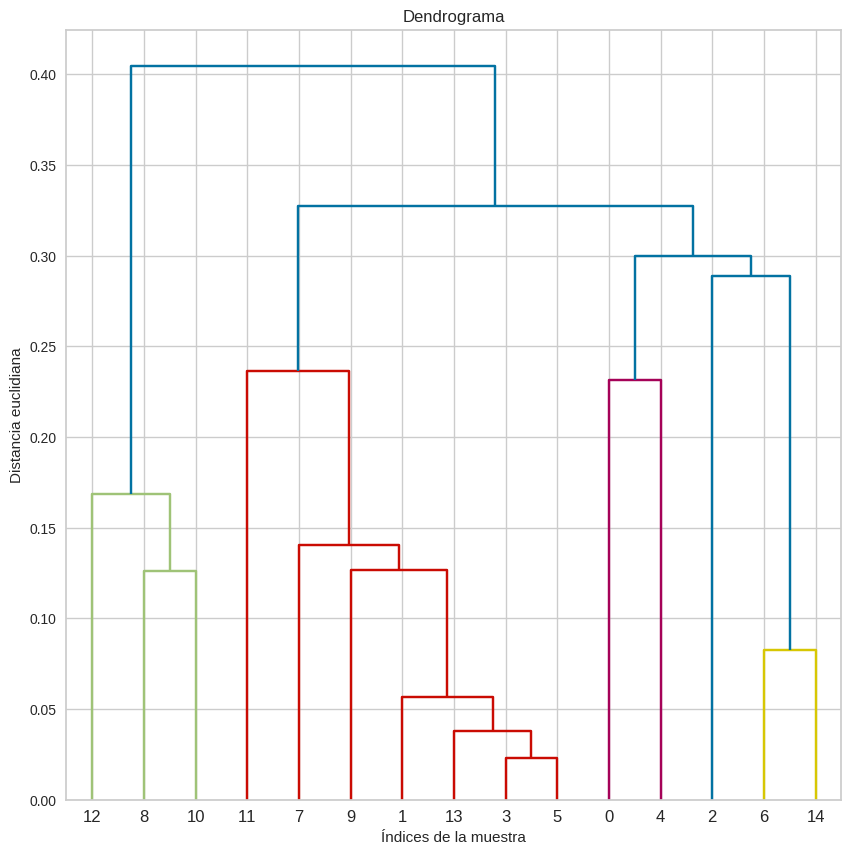

In [96]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

agglomerative_clustering = AgglomerativeClustering(n_clusters=7, metric='euclidean', linkage='ward')

agglomerative_clustering.fit(X_numerics_scaled)

labels = agglomerative_clustering.labels_


plt.figure(figsize=(10, 10))

dendrogram = sch.dendrogram(sch.linkage(X_numerics_scaled[:15]))

plt.title('Dendrograma')
plt.xlabel('Índices de la muestra')
plt.ylabel('Distancia euclidiana')
plt.show()

De las comparaciones anteriores se desprende claramente que DBSCAN no consigue generar clusters razonables. Lo más probable es que se deba a que DBCSAN intenta encontrar conglomerados basándose en la densidad de los puntos. Si uno de nuestros clusters es menos denso que otros, DBSCAN producirá resultados subóptimos al no reconocer el grupo menos denso como un cluster.

Por su parte, los algoritmos K-Means y Affinity Propagation crearon 6 clusters razonables.

Otras conclusiones:

Se sugiere que una una distribución más equitativa en el grupo de los hombres en comparación con el grupo de las mujeres pero según la prueba de Kolmorov-Smirnov concluye que estas diferentes no son lo suficientemente grandes apra ser consideradas estadísticamente significativas, es decir, no hay suficiente evidencia para afirmar que las diferencias observadas entre las dos distribuciones (hombres y mujeres) no sean resultado del azar o de variabilidad aleatoria de la muestra.

Según los resultados de esta prueba, las diferencias observadas entre los ingresos de hombres y mujeres podrían deberse al azar o a la variabilidad aleatoria en la muestra, y no reflejan diferencias genuinas en la población de donde se extrajo la muestra.

Se podría aplicar otro KMeans con menoscantidad decentroides (2 o 3) y mirar si se pueden separar a la muestra en función de la edad y el Spending Score

En KMeans, con 5 cluster se obtienen mejores resultados para comparar Spending con Age.

Con el DBScan, el valor de clusters que más se obtiene es de 5 con 37 apariciones. Luego sigue 6 con 31.
* Clusters: 5 	 Apariciones: 37
* Clusters: 6 	 Apariciones: 31
* Clusters: 7 	 Apariciones: 24
* Clusters: 4 	 Apariciones: 14
* Clusters: 8 	 Apariciones: 11
* Clusters: 11 	 Apariciones: 6
* Clusters: 10 	 Apariciones: 3
* Clusters: 12 	 Apariciones: 3
* Clusters: 13 	 Apariciones: 2
* Clusters: 17 	 Apariciones: 1
* Clusters: 14 	 Apariciones: 1